In [16]:
import matplotlib.pyplot as plt
from math import floor, factorial

In [3]:
def runge_kutta_edo2(Fx, a, b, y0, y1, N, Px, Qx, n):
    '''funcion que resuelve la EDO2 de la forma y'' + p(x)y' + q(x)y = f(x) usando el método de Runge-Kutta de orden 4
    
    INPUTS:
    - Fx: funcion f(x)
    - a, b: extremos del intervalo 
    - y0, y1: condiciones iniciales para y(a) y y'(a)
    - N: numero de subintervalos
    - Px, Qx: funciones p(x) y q(x)
    - n: parametro de la funcion q(x)
    '''

    h = (b-a)/N  # paso

    x = [a]
    u = [y0]  # u(x) = y(x)
    v = [y1]  # v(x) = y'(x)

    for k in range(N):
        x.append(x[k] + h)
        k1u = h * v[k]
        k1v = h * (-Px(x[k]) * v[k] - Qx(x[k], n) * u[k] + Fx(x[k]))

        k2u = h * (v[k] + 0.5 * k1v)
        k2v = h * (-Px(x[k] + 0.5 * h) * (v[k] + 0.5 * k1v) - Qx(x[k] + 0.5 * h, n) * (u[k] + 0.5 * k1u) + Fx(x[k] + 0.5 * h))

        k3u = h * (v[k] + 0.5 * k2v)
        k3v = h * (-Px(x[k] + 0.5 * h) * (v[k] + 0.5 * k2v) - Qx(x[k] + 0.5 * h, n) * (u[k] + 0.5 * k2u) + Fx(x[k] + 0.5 * h))

        k4u = h * (v[k] + k3v)
        k4v = h * (-Px(x[k] + h) * (v[k] + k3v) - Qx(x[k] + h, n) * (u[k] + k3u) + Fx(x[k] + h))

        u.append(u[k] + (k1u + 2 * k2u + 2 * k3u + k4u) / 6)
        v.append(v[k] + (k1v + 2 * k2v + 2 * k3v + k4v) / 6)

    return x, u, v


## Ejemplo 1: Ecuación Bessel
$$y'' + \frac{1}{x}y' + \left(1-\frac{n^2}{x^2}\right) y = 0$$
$n=0,1,2,3,...$  
  
$
\begin{cases}
    y(0.1) = 0 \\
    y'(0.1) = 1
\end{cases}
$


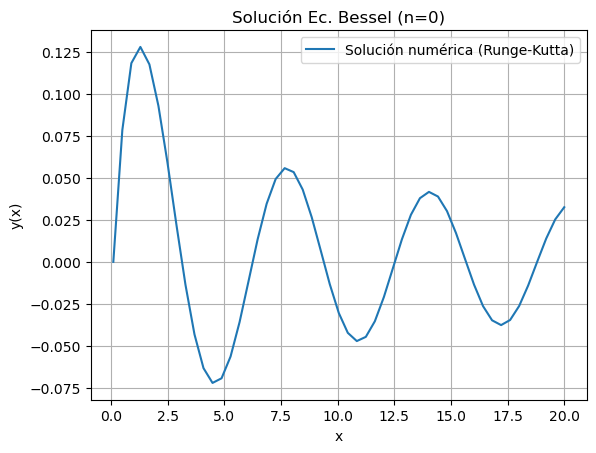

In [6]:
def f(x):
    return 0

def P(x):
    '''polinomio que acompaña a y' en la EDO2'''
    return 1/x

def Q(x, n):
    '''polinomio que acompaña a y en la EDO2'''
    return (1 - (n/x)**2)


#condiciones iniciales
a = 0.1
b = 20
y0 = 0
y1 = 1
N = 50  # la mitad de intervalos
n = 0

valores_x_rk, sol_y_rk, sol_y_1_rk = runge_kutta_edo2(f, a, b, y0, y1, N, P, Q, n)

# Visualización de los resultados
plt.plot(valores_x_rk, sol_y_rk, label='Solución numérica (Runge-Kutta)')
#plt.plot(valores_x_rk, sol_y_1_rk, label='Derivada de la solución (Runge-Kutta)')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Solución Ec. Bessel (n=0)')
plt.legend()
plt.grid(True)
plt.show()

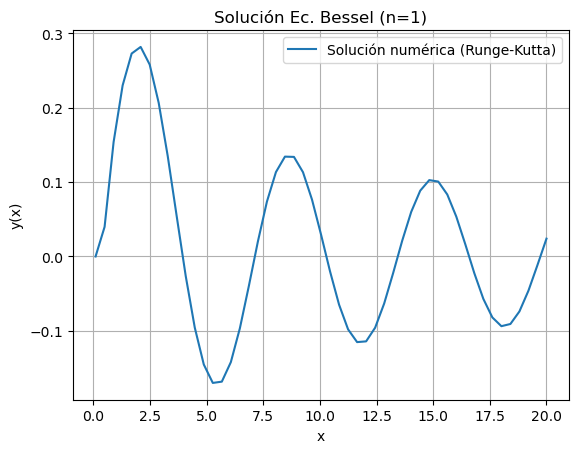

In [8]:
n = 1

valores_x_rk, sol_y_rk, sol_y_1_rk = runge_kutta_edo2(f, a, b, y0, y1, N, P, Q, n)

# Visualización de los resultados
plt.plot(valores_x_rk, sol_y_rk, label='Solución numérica (Runge-Kutta)')
#plt.plot(valores_x_rk, sol_y_1_rk, label='Derivada de la solución (Runge-Kutta)')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Solución Ec. Bessel (n=1)')
plt.legend()
plt.grid(True)
plt.show()

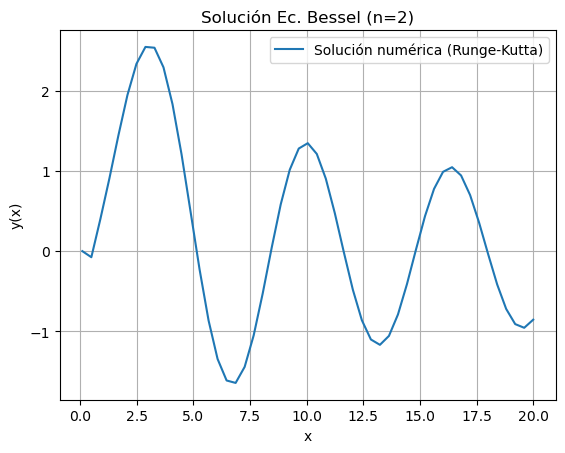

In [9]:
n = 2

valores_x_rk, sol_y_rk, sol_y_1_rk = runge_kutta_edo2(f, a, b, y0, y1, N, P, Q, n)

# Visualización de los resultados
plt.plot(valores_x_rk, sol_y_rk, label='Solución numérica (Runge-Kutta)')
#plt.plot(valores_x_rk, sol_y_1_rk, label='Derivada de la solución (Runge-Kutta)')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Solución Ec. Bessel (n=2)')
plt.legend()
plt.grid(True)
plt.show()

## Ejercicio 2: Ecuación de Legendre
$$ y'' - \frac{2x}{1-x^2}y' + \frac{n(n+1)}{1-x^2}y = 0 $$
$n=0,1,2,3,...$

$
\begin{cases}
    y(0) = 0 \\
    y'(0) = 1
\end{cases}
$

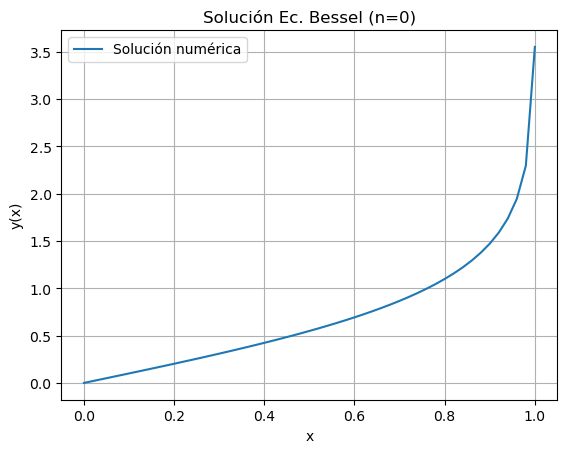

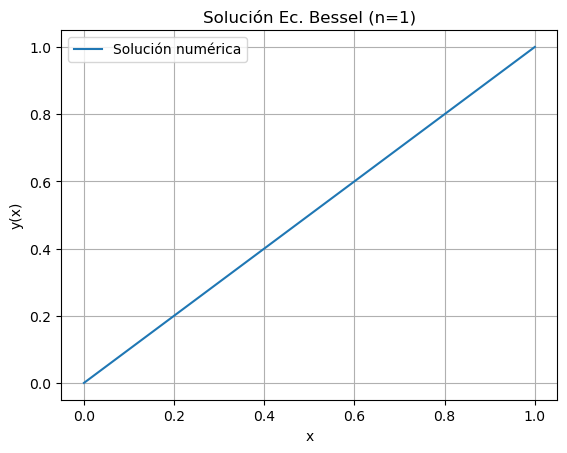

In [15]:
def f(x):
    return 0

def P(x):
    '''polinomio que acompaña a y' en la EDO2'''
    return -(2*x)/(1-x**2)

def Q(x, n):
    '''polinomio que acompaña a y en la EDO2'''
    return n*(n+1)/(1-x**2)

#condiciones iniciales
a = 0
b = 1
y0 = 0
y1 = 1
N = 50  # la mitad de intervalos

for n in range(2):
    valores_x, sol_y, sol_y_1 = runge_kutta_edo2(f, a, b, y0, y1, N, P, Q, n)
    plt.plot(valores_x, sol_y, label='Solución numérica')
    #plt.plot(valores_x, sol_y_1, label='Derivada de la solución')
    plt.xlabel('x')
    plt.ylabel('y(x)')
    plt.title(f'Solución Ec. Bessel (n={n})')
    plt.legend()
    plt.grid(True)
    plt.show()

## Ejemplo 3: Polinomios de Chebyshev de 1ª especie
$$ y'' - \frac{x}{1-x^2}y' + \frac{n^2}{1-x^2}y = 0 $$
$x\in [-1,1]$

$
\begin{cases}
    y(-1) = (-1)^n \\
    y'(-1) = \frac{n}{2} \sum_{k=0}^{[n/2]} (-1)^k \frac{(n-k-1)!}{m!(n-2k-1)!}(-2)^{n-2k-1} 
\end{cases}
$


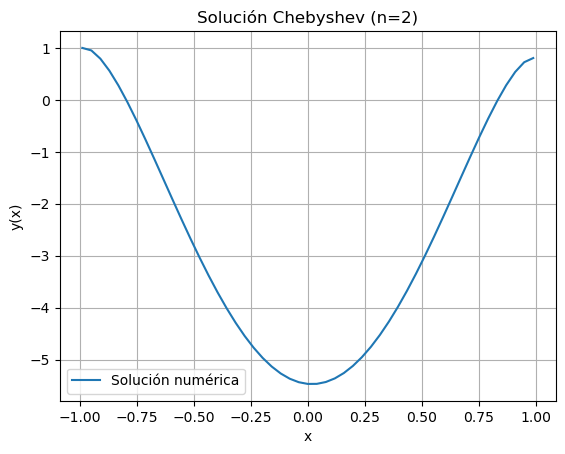

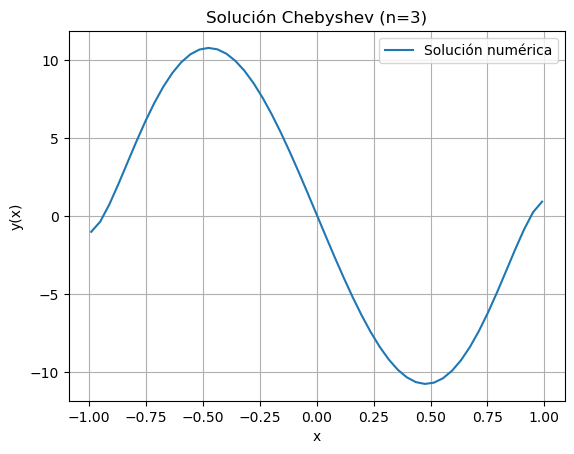

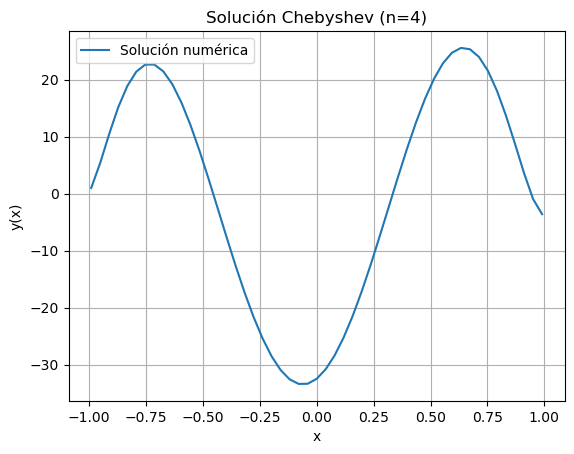

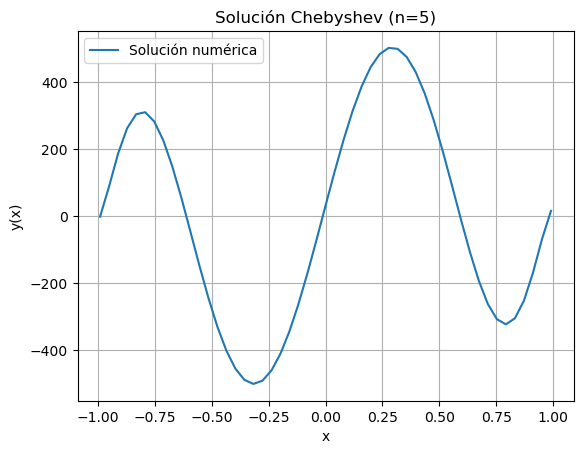

In [22]:
# ejemplo polinomio Chebyshev de primera especie
def f(x):
    return 0

def P(x):
    '''polinomio que acompaña a y' en la EDO2'''
    return x/(1-x**2)

def Q(x, n):
    '''polinomio que acompaña a y en la EDO2'''
    return n**2/(1-x**2)

# condiciones iniciales
a = -0.99
b = 0.99

def y0(n):
    return (-1)**n

def y1(n):
    return n/2 * sum( [ factorial(n-k-1)/factorial(k)*factorial(n-2*k-1) for k in range(0, floor(n/2)) ] )

N = 50  # la mitad de intervalos


for n in range(2,6):
    valores_x, sol_y, sol_y_1 = runge_kutta_edo2(f, a, b, y0(n), y1(n), N, P, Q, n)
    plt.plot(valores_x, sol_y, label='Solución numérica')
    plt.xlabel('x')
    plt.ylabel('y(x)')
    plt.title(f'Solución Chebyshev (n={n})')
    plt.legend()
    plt.grid(True)
    plt.show()